In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from torchvision.utils import make_grid
import os
import random
import numpy as np
import pandas as pd
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, jaccard_score
from google.colab import drive

In [ ]:
torch.__version__

'2.0.0+cu118'

In [ ]:

!nvidia-smi

Tue Apr  4 10:07:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.cuda.empty_cache()

In [ ]:
class BrainTumorDataset(Dataset):
  def __init__(self, images, labels):
    # images
    self.X = images
    # labels
    self.y = labels
    
    # Transformation for converting original image array to an image and then convert it to a tensor
    self.transform = transforms.Compose([transforms.ToPILImage(),
        transforms.ToTensor()
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -45 degrees and 45 degrees, and then convert it to a tensor
    self.transform1 = transforms.Compose([
        transforms.ToPILImage(),                                          
        transforms.RandomRotation(45),
        transforms.ToTensor()                                 
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -90 degrees and 90 degrees, and then convert it to a tensor
    self.transform2 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(90),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -120 degrees and 120 degrees, and then convert it to a tensor
    self.transform3 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(120),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -180 degrees and 180 degrees, and then convert it to a tensor
    self.transform4 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(180),
        transforms.ToTensor()                                
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -270 degrees and 270 degrees, and then convert it to a tensor
    self.transform5 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(270),
        transforms.ToTensor()                                
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -300 degrees and 300 degrees, and then convert it to a tensor
    self.transform6 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(300),
        transforms.ToTensor()                               
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -330 degrees and 330 degrees, and then convert it to a tensor
    self.transform7 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(330),
        transforms.ToTensor()                                 
    ])

  def __len__(self):
    # return length of image samples
    return len(self.X)

  def __getitem__(self, idx):
    # perform transformations on one instance of X
    # Original image as a tensor
    data = self.transform(self.X[idx])

    # Augmented image at 45 degrees as a tensor
    aug45 = self.transform1(self.X[idx])

    # Augmented image at 90 degrees as a tensor
    aug90 = self.transform2(self.X[idx])

    # Augmented image at 120 degrees as a tensor
    aug120 = self.transform3(self.X[idx])

    # Augmented image at 180 degrees as a tensor
    aug180 = self.transform4(self.X[idx])

    # Augmented image at 270 degrees as a tensor
    aug270 = self.transform5(self.X[idx])

    # Augmented image at 300 degrees as a tensor
    aug300 = self.transform6(self.X[idx])

    # Augmented image at 330 degrees as a tensor
    aug330 = self.transform7(self.X[idx])      
    
    # store the transformed images in a list
    new_batch = [data, aug45, aug90, aug120, aug180, aug270, aug300, aug330]

    # one-hot encode the labels
    labels = torch.zeros(4, dtype=torch.float32)
    labels[int(self.y[idx])] = 1.0

    new_labels = [labels, labels, labels, labels, labels, labels, labels, labels]

    # 8 augmented images and corresponding labels per sample will be returned
    return (torch.stack(new_labels), torch.stack(new_batch))
     


In [ ]:
training_data = pickle.load(open('/content/drive/My Drive/Colab Notebooks/new_dataset/training_data.pickle', 'rb'))

In [ ]:
Xt = []
yt = []
features = None
labels = None
label = []

In [ ]:
for features,labels in training_data:
  Xt.append(features)
  yt.append(labels)

In [ ]:
# 70 % training, 15% validating, 15% testing
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.3, shuffle=True)  # 70% training, 30% testing
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)  # split testing set into 50% validation , 50% testing 

In [ ]:
Xt = None
yt = None
features = None
labels = None
label = None
training_data = None 

In [ ]:
train_set = BrainTumorDataset(X_train, y_train)
valid_set = BrainTumorDataset(X_valid, y_valid)
test_set = BrainTumorDataset(X_test, y_test)

In [ ]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_valid)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 2144
Number of validation samples: 460
Number of testing samples: 460


In [ ]:
print(f"Number of augmented training samples: {len(X_train) * 8}")
print(f"Number of augmented validation samples: {len(X_valid)* 8}")
print(f"Number of augmented testing samples: {len(X_test)* 8}")

Number of augmented training samples: 17152
Number of augmented validation samples: 3680
Number of augmented testing samples: 3680


In [ ]:
train_gen = DataLoader(train_set, batch_size=4, shuffle=True, pin_memory=True, num_workers=8)
valid_gen = DataLoader(valid_set, batch_size=4, shuffle=True, pin_memory=True, num_workers=8)
test_gen = DataLoader(test_set, batch_size=10, shuffle=True, pin_memory=True, num_workers=8)

In [ ]:
device_name = "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

In [ ]:
vgg16 = models.vgg16(pretrained=True)
vgg16.to(device)
print(vgg16)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 298MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16.classifier[6].out_features = 3
# freeze convolution weights
for param in vgg16.features.parameters():
    param.requires_grad = False

In [ ]:
import torch.optim as optim

In [ ]:
# loss function
# if GPU is available set loss function to use GPU
criterion = nn.CrossEntropyLoss().to(device)

# optimizer
optimizer = torch.optim.SGD(vgg16.classifier.parameters(), momentum=0.9, lr=3e-4)

# number of training iterations
epochs = 30

# empty lists to store losses and accuracies
train_losses = []
test_losses = []
train_correct = []
test_correct = []

In [ ]:
def save_checkpoint(state, is_best, filename='/content/drive/My Drive/bt_vgg_ckpt_v2.pth.tar'):
    torch.save(state, filename)

In [ ]:
# set training start time
start_time = time.time()

# set best_prec loss value as 2 for checkpoint threshold
best_prec1 = 2

# empty batch variables
b = None
train_b = None
test_b = None

# start training
for i in range(epochs):
    # empty training correct and test correct counter as 0 during every iteration
    trn_corr = 0
    tst_corr = 0
    
    # set epoch's starting time
    e_start = time.time()
    
    # train in batches
    for b, (y, X) in enumerate(train_gen):
        # set label as cuda if device is cuda
        X, y = X.to(device), y.to(device)

        # forward pass image sample
        y_pred = vgg16(X.view(-1, 3, 512, 512))
        # calculate loss
        loss = criterion(y_pred.float(), torch.argmax(y.view(32, 4), dim=1).long())

        # get argmax of predicted tensor, which is our label
        predicted = torch.argmax(y_pred, dim=1).data
        # if predicted label is correct as true label, calculate the sum for samples
        batch_corr = (predicted == torch.argmax(y.view(32, 4), dim=1)).sum()
        # increment train correct with correcly predicted labels per batch
        trn_corr += batch_corr
        
        # set optimizer gradients to zero
        optimizer.zero_grad()
        # back propagate with loss
        loss.backward()
        # perform optimizer step
        optimizer.step()

    # set epoch's end time
    e_end = time.time()
    # print training metrics
    print(f'Epoch {(i+1)} Batch {(b+1)*4}\nAccuracy: {trn_corr.item()*100/(4*8*b):2.2f} %  Loss: {loss.item():2.4f}  Duration: {((e_end-e_start)/60):.2f} minutes') # 4 images per batch * 8 augmentations per image * batch length

    # some metrics storage for visualization
    train_b = b
    train_losses.append(loss)
    train_correct.append(trn_corr)

    X, y = None, None

    # validate using validation generator
    # do not perform any gradient updates while validation
    with torch.no_grad():
        for b, (y, X) in enumerate(valid_gen):
            # set label as cuda if device is cuda
            X, y = X.to(device), y.to(device)

            # forward pass image
            y_val = vgg16(X.view(-1, 3, 512, 512))

            # get argmax of predicted tensor, which is our label
            predicted = torch.argmax(y_val, dim=1).data

            # increment test correct with correcly predicted labels per batch
            tst_corr += (predicted == torch.argmax(y.view(32, 4), dim=1)).sum()

    # get loss of validation set
    loss = criterion(y_val.float(), torch.argmax(y.view(32, 4), dim=1).long())
    # print validation metrics
    print(f'Validation Accuracy {tst_corr.item()*100/(4*8*b):2.2f} Validation Loss: {loss.item():2.4f}\n')

    # if current validation loss is less than previous iteration's validatin loss create and save a checkpoint
    is_best = loss < best_prec1
    best_prec1 = min(loss, best_prec1)
    save_checkpoint({
            'epoch': i + 1,
            'state_dict': vgg16.state_dict(),
            'best_prec1': best_prec1,
        }, is_best)

    # some metrics storage for visualization
    test_b  = b
    test_losses.append(loss)
    test_correct.append(tst_corr)

# set total training's end time
end_time = time.time() - start_time    

# print training summary
print("\nTraining Duration {:.2f} minutes".format(end_time/60))
print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
print("GPU memory cached : {} kb".format(torch.cuda.memory_cached()))


Epoch 1 Batch 2144
Accuracy: 74.76 %  Loss: 0.2678  Duration: 1.02 minutes
Validation Accuracy 83.47 Validation Loss: 1.1586

Epoch 2 Batch 2144
Accuracy: 84.60 %  Loss: 0.0858  Duration: 0.89 minutes
Validation Accuracy 86.16 Validation Loss: 0.2353

Epoch 3 Batch 2144
Accuracy: 86.25 %  Loss: 0.8392  Duration: 0.89 minutes
Validation Accuracy 86.57 Validation Loss: 0.1313

Epoch 4 Batch 2144
Accuracy: 86.74 %  Loss: 0.1163  Duration: 0.89 minutes
Validation Accuracy 87.34 Validation Loss: 0.2738

Epoch 5 Batch 2144
Accuracy: 87.90 %  Loss: 0.9040  Duration: 0.89 minutes
Validation Accuracy 87.80 Validation Loss: 0.3657

Epoch 6 Batch 2144
Accuracy: 88.86 %  Loss: 0.6176  Duration: 0.89 minutes
Validation Accuracy 85.99 Validation Loss: 0.0565

Epoch 7 Batch 2144
Accuracy: 89.72 %  Loss: 0.4573  Duration: 0.89 minutes
Validation Accuracy 88.79 Validation Loss: 0.2728

Epoch 8 Batch 2144
Accuracy: 89.22 %  Loss: 0.6020  Duration: 0.89 minutes
Validation Accuracy 87.72 Validation Loss: 

In [ ]:
torch.cuda.empty_cache()

In [ ]:
print(f'Validation accuracy: {test_correct[-1].item()*100/(test_b*8*4):.2f}%')

Validation accuracy: 91.69%


In [ ]:
train_gen = None
valid_gen = None
train_set = None
valid_set = None

In [ ]:
vgg16.eval()

# perform no gradient updates
with torch.no_grad():
    # soem metrics storage for visualization and analysis
    correct = 0
    test_loss = []
    test_corr = []
    labels = []
    pred = []
    # perform test set evaluation batch wise
    for (y, X) in test_gen:
        # set label to use CUDA if available
        X, y = X.to(device), y.to(device)

        # append original labels
        labels.append(torch.argmax(y.view(10 * 8, 4), dim=1).data)

        # perform forward pass
        y_val = vgg16(X.view(-1, 3, 512, 512))

        # get argmax of predicted values, which is our label
        predicted = torch.argmax(y_val, dim=1).data
        # append predicted label
        pred.append(predicted)

        # calculate loss
        loss = criterion(y_val.float(), torch.argmax(y.view(10 * 8, 4), dim=1).long())

        # increment correct with correcly predicted labels per batch
        correct += (predicted == torch.argmax(y.view(10 * 8, 4), dim=1)).sum()

        # append correct samples labels and losses
        test_corr.append(correct)
        test_loss.append(loss)
        
print(f"Test Loss: {test_loss[-1].item():.4f}")
     

Test Loss: 0.1783


In [ ]:
print(f'Test accuracy: {test_corr[-1].item()*100/(460*8):.2f}%')

Test accuracy: 92.07%


In [ ]:
labels = torch.stack(labels)
pred = torch.stack(pred)

In [ ]:
LABELS = ['Meningioma', 'Glioma', 'Pitutary']

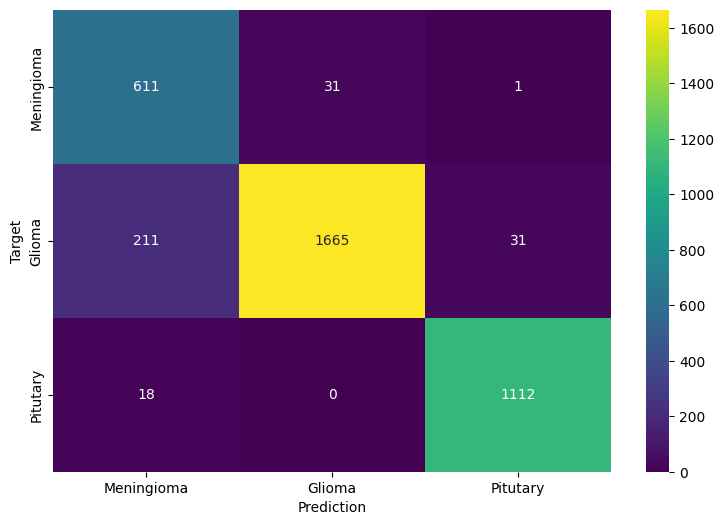

In [ ]:
arr = confusion_matrix(pred.view(-1).cpu(), labels.view(-1).cpu())
df_cm = pd.DataFrame(arr, LABELS, LABELS)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

In [ ]:
print(f"Clasification Report\n\n{classification_report(pred.view(-1).cpu(), labels.view(-1).cpu())}")

Clasification Report

              precision    recall  f1-score   support

           1       0.73      0.95      0.82       643
           2       0.98      0.87      0.92      1907
           3       0.97      0.98      0.98      1130

    accuracy                           0.92      3680
   macro avg       0.89      0.94      0.91      3680
weighted avg       0.93      0.92      0.92      3680

